<a href="https://colab.research.google.com/github/Shimamoto0000/Deep-Learning2022Late/blob/main/CNN%E3%81%A7%E7%94%BB%E5%83%8F%E5%88%86%E9%A1%9E2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNNで画像分類
## CNNでCIFAR-10の画像データを訓練し、ネットなどの任意の画像を正しく分類できるかどうかを確認

## 学習用のライブラリを読み込む

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Dropout

## データセットと表示用のライブラリもimportする
### データセットはtensorflow内のCIFAR-10

In [ ]:
import tensorflow as tf # CIFAR10のために読み込む
from matplotlib import pyplot # グラフのプロット表示
import numpy as np  # データ計算
import cv2  # computer vison 画像を取り扱う

## CIFAR10を読み込む

In [ ]:
cifar = tf.keras.datasets.cifar10

### CIFAR10からデータを読み込んで学習用とテスト検証用に振り分ける

In [ ]:
( x_train, y_train ), ( x_test, y_test ) = cifar.load_data( ) # データをロード

## CIFAR10の答え用のキーワード（ラベル）の配列を用意

In [ ]:
labels = ["飛行機", "自動車", "鳥", "猫", "鹿", "犬", "カエル", "馬", "船", "トラック"]

In [ ]:
x_train = x_train.astype('float32') / 255 # データの値を255で割って学習用にする
x_test = x_test.astype('float32') / 255

In [ ]:
y_train = tf.keras.utils.to_categorical( y_train, 10 )
y_test = tf.keras.utils.to_categorical( y_test, 10 )

In [ ]:
# ロードしたデータの数を確認
print( len( x_train ) )
print( len( x_test ) )
print( len( y_train ) )
print( len( y_test ) )

50000
10000
50000
10000


In [ ]:
BatchNormalization = tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer='zeros',
    gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones',
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None
)

In [ ]:
inputs = (32,32,3)


model = Sequential()


model.add(Conv2D(64,(3,3),padding = "same",activation= "relu", input_shape = inputs))
model.add(Conv2D(64,(3,3),padding = "same",activation= "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(64,(3,3),padding = "same",activation= "relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding = "same",activation= "relu"))
model.add(Conv2D(128,(3,3),padding = "same",activation= "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128,(3,3),padding = "same",activation= "relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),padding = "same",activation= "relu"))
model.add(Conv2D(256,(3,3),padding = "same",activation= "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(256,(3,3),padding = "same",activation= "relu"))
model.add(Conv2D(256,(3,3),padding = "same",activation= "relu"))
model.add(Conv2D(256,(3,3),padding = "same",activation= "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(512,(3,3),padding = "same",activation= "relu"))
model.add(Conv2D(512,(3,3),padding = "same",activation= "relu"))
model.add(tf.keras.layers.BatchNormalization())
#GlobalAveragePooling2D
model.add(MaxPooling2D())
model.add(Dense(1024,activation = "relu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation = "softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0

In [ ]:
# # 層をたくさん追加するので、リストでまとめて追加する
# num_classes = len(labels) # 分類数
# in_shape = ( 32, 32, 3 )
# model = Sequential( [
#     Conv2D( 32, (3,3), padding='same', input_shape=in_shape ),
#     #tf.keras.layers.Activation('relu'),
#     Conv2D( 32,( 3,3 ), padding='same' ),
#     #tf.keras.layers.Activation('relu'),
#     MaxPooling2D( pool_size=(2,2) ),
#     Dense(256, activation='relu'),
#     Dropout( 0.25 ),

#     Conv2D( 32, (3,3), padding='same' ),
#     #tf.keras.layers.Activation('relu'),
#     Conv2D( 32,( 3,3 ), padding='same' ),
#     #tf.keras.layers.Activation('relu'),
#     Dense(256, activation='relu'),
#     Dropout( 0.25 ),

#     Conv2D( 32, (3,3), padding='same' ),
#     #tf.keras.layers.Activation('relu'),
#     Conv2D( 32,( 3,3 ), padding='same' ),
#     #tf.keras.layers.Activation('relu'),
#     Dense(256, activation='relu'),
#     Dropout( 0.25 ),

#     Conv2D( 32, (3,3), padding='same' ),
#     #tf.keras.layers.Activation('relu'),
#     Conv2D( 32,( 3,3 ), padding='same' ),
#     #tf.keras.layers.Activation('relu'),
#     MaxPooling2D( pool_size=(2,2) ),
#     Dense(256, activation='relu'),
#     Dropout( 0.25 ),

#     Flatten( ),
#     Dense( 512 ),
#     tf.keras.layers.Activation('relu'),
#     Dropout( 0.5 ),
#     Dense( num_classes ),
#     tf.keras.layers.Activation('softmax'),
# ] )

In [ ]:
!pip install tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
optimizer = tfa.optimizers. RectifiedAdam (learning_rate=0.1, weight_decay=0.001)

In [ ]:
import keras 
model.compile( 
    loss='categorical_crossentropy', # 損失の計算法
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), # 最適化の方法
    metrics=['accuracy'] # 評価の基準、計算法（accuracy=精度）
 )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## 組み立てた学習モデルで訓練する

In [ ]:
fit = model.fit(
    x_train, y_train, # 学習用問題データとその正解（ラベル）
    batch_size = 128, # まとめて学習する量
    epochs=100, # 学習を繰り返す回数
    verbose=1, # ログ出力のフラグ（標準出力に出力する）
    validation_data = (x_test, 
                       y_test) # 学習中の検証チェック用データ
)

Epoch 1/100
391/391 [==============================] - 41s 90ms/step - loss: 1.9753 - accuracy: 0.3280 - val_loss: 2.5328 - val_accuracy: 0.1960
Epoch 2/100
391/391 [==============================] - 32s 81ms/step - loss: 1.3387 - accuracy: 0.5165 - val_loss: 1.3060 - val_accuracy: 0.5578
Epoch 3/100
391/391 [==============================] - 32s 83ms/step - loss: 1.0941 - accuracy: 0.6115 - val_loss: 1.2264 - val_accuracy: 0.5944
Epoch 4/100
391/391 [==============================] - 32s 82ms/step - loss: 0.9541 - accuracy: 0.6651 - val_loss: 1.0273 - val_accuracy: 0.6562
Epoch 5/100
391/391 [==============================] - 32s 82ms/step - loss: 0.8519 - accuracy: 0.7031 - val_loss: 1.0115 - val_accuracy: 0.6525
Epoch 6/100
391/391 [==============================] - 32s 82ms/step - loss: 0.8626 - accuracy: 0.7096 - val_loss: 2.1601 - val_accuracy: 0.3800
Epoch 7/100
391/391 [==============================] - 32s 82ms/step - loss: 0.7936 - accuracy: 0.7293 - val_loss: 0.8792 - val_ac

## 訓練の状況を確認する

In [ ]:
# 訓練の精度の経過を取得
acc = fit.history['accuracy']
# 訓練の損失の経過を取得
loss = fit.history['loss']
# 訓練の回数を算出
epochs = range(len(acc))

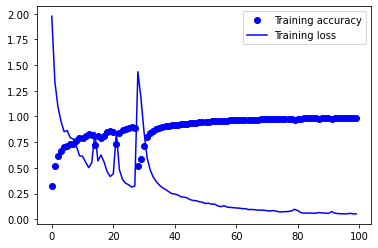

<Figure size 432x288 with 0 Axes>

In [ ]:
# accとlossの値をプロットしていく
# 精度(acc)を青いドット(bo)でプロット
pyplot.plot( epochs, acc, 'bo', label='Training accuracy' )
# 損失(loss)を青線(b)でプロット
pyplot.plot( epochs, loss, 'b', label='Training loss' )
# 凡例をつける
pyplot.legend( )
# 描画領域を設定
pyplot.figure( )
pyplot.show( ) # 表示

## 訓練した学習モデルで検証する

In [ ]:
# コンパイルで指定したmetrics = accuracy で評価する
model.evaluate( x_test, y_test, verbose=2 )

313/313 - 3s - loss: 0.6185 - accuracy: 0.8762 - 3s/epoch - 9ms/step


[0.6184622049331665, 0.8762000203132629]

In [ ]:
probability_model = Sequential([
                                model,
                                tf.keras.layers.Softmax( )
                                ])

tf.Tensor(
[[0.0853411  0.08534081 0.08534327 0.23191577 0.08534022 0.08534163
  0.0853559  0.08534016 0.08534093 0.0853402 ]
 [0.0853373  0.08533701 0.08533686 0.08533689 0.08533686 0.08533686
  0.08533686 0.08533686 0.23196739 0.08533706]
 [0.085398   0.08542214 0.08535735 0.08537465 0.08535736 0.08535791
  0.08536008 0.0853574  0.23164959 0.08536558]
 [0.23163268 0.08536569 0.08536696 0.08538162 0.08539932 0.08535849
  0.08535901 0.08535866 0.08539877 0.08537883]
 [0.08533675 0.08533675 0.08533675 0.08533675 0.08533675 0.08533675
  0.23196931 0.08533675 0.08533675 0.08533675]
 [0.08533683 0.08533683 0.08533684 0.08533741 0.08533685 0.08533683
  0.23196796 0.08533683 0.08533683 0.08533683]
 [0.08533699 0.23196569 0.08533697 0.08533701 0.08533698 0.08533698
  0.08533698 0.08533697 0.08533698 0.08533846]
 [0.08541753 0.08541881 0.08546589 0.085744   0.0855736  0.08541777
  0.23071203 0.08541637 0.08541614 0.0854178 ]], shape=(8, 10), dtype=float32)
['猫', '船', '船', '飛行機', 'カエル', 'カエル', 

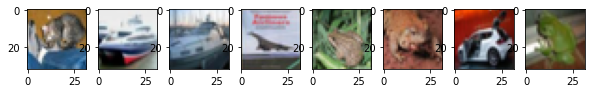

In [ ]:
tests = x_test[:8] # 一部を切り抜く
# 切り抜いたデータをプロットで表示
pyplot.figure( figsize=(10, 10) )
for i in range(0, len(tests)):
  pyplot.subplot( 1, len(tests), i+1 )
  pyplot.imshow( tests[i], cmap='gray' )
r = probability_model( tests ) # 分類結果を変数rに代入
print(r)
result = [ ]
# ループしながらrに追加していく
for i in np.argmax( r.numpy( ), axis=1 ):
  result.append( labels[i] )
print(result)

# 画像をアップロードする処理を作る

In [ ]:
from google.colab import files
r = files.upload( ) # ファイルをアップロード（ボタンが出る）
if len(r) == 0: # もしデータが空だったら、失敗とみなす
  print("ファイルをアップロードできませんでした")
else: # 成功ルート
  filename = list(r.keys())[0] # データのキーの先頭をファイル名として取得
  img = cv2.imread(filename) # 画像データを読み込む
  import os
  os.remove(filename) # ファイルを掃除
  # 画像データの色情報の方式を変換 ComputerVisionのBGRからRGBに変換
  img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB ) # 変換してimgを上書き
  img = cv2.resize( img, (32,32) ) # リサイズしてimgを上書き
  pyplot.imshow(img) # プロットに設定
  pyplot.axis("off")  # 罫線をオフ
  #pyplot.show( ) # 画像を表示


## アップロードした画像を分類させる



In [ ]:
# 画像データを学習データと同じ形に整形する
img = img.reshape(1, 32, 32, 3) 
ans = probability_model( [img] ) # 学習済みモデルで判定
print( ans ) # 分類結果を表示

### labels = ["飛行機", "自動車", "鳥", "猫", "鹿", "犬", "カエル", "馬", "船", "トラック"]

### 一番高い可能性のインデックスをキーワードに変換して表示

In [ ]:
answer_idx = int(np.argmax( ans, axis=1 ))
print( answer_idx )
answer_word = labels[ answer_idx ]
print( "この画像は" + answer_word + "です" )